In [1]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Q2.0.
#(1)
def forwardEuler(f, Df, tn, yn, h):
    return yn + h * f(tn,yn)
    
#(2)
def Q11(f,Df, t0,y0, h):
    f0 = f(t0,y0)
    f1 = f(t0+h, y0+h*f0)
    return y0 + h/2*(f0+f1)

#(3)
def evolve(phi,f,Df, t0,y0, T,N):
    h = T/N # could also be h=(T-t0)/N
    y = np.zeros([N+1, len(y0)])
    t = np.zeros( N+1 )
    y[0] = y0
    t[0] = 0   # could be t[0]=t0
    for i in range(N):
        y[i+1] = phi(f,Df, t[i],y[i], h)
        t[i+1] = t[i]+h
    return t,y

#(4)
def computeEocs(herr):
    eoc_vals = []
    for i in range(0, len(herr[:,0])-1):
        eoc = np.log(herr[i+1,1]/herr[i,1])/np.log(herr[i+1,0]/herr[i,0])
        eoc_vals.append(eoc)
    eoc_vals = np.array(eoc_vals)
    return eoc_vals

h values and error values = 
 [[4.00000000e-01 1.19752047e+00]
 [2.00000000e-01 3.84901290e-01]
 [1.00000000e-01 1.42446210e-01]
 [5.00000000e-02 6.52549668e-02]
 [2.50000000e-02 3.13565585e-02]
 [1.25000000e-02 1.53834975e-02]
 [6.25000000e-03 7.62053478e-03]
 [3.12500000e-03 3.79267758e-03]
 [1.56250000e-03 1.89196759e-03]
 [7.81250000e-04 9.44898934e-04]]
EOCs = 
 [1.6374899  1.43407127 1.12625762 1.05732049 1.02738368 1.0134194
 1.00667551 1.00332936 1.00165544]


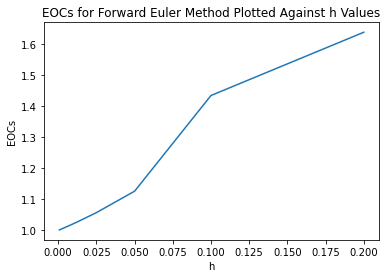

In [3]:
#Q2.1.

#calculating the exact solution
def Y1(t):
    y1 = (2*(np.e**t))/(2*(np.e**t)-1)
    y2 = (-2*(np.e**t))/(4*(np.e**(2*t)) - 4*(np.e**(t)) + 1)
    return np.array([y1, y2])

#writing right hand side of ODE
def f1(t, y):
    y1 = y[0]
    y2 = y[1]
    f1 = np.array([y2, y2*(1 - 2*y1)])
    return f1

# eocs finding method
def eocs_finder(method, f, T, Y, N0, y0, t0):
    my_herr = np.zeros([10, 2])
    for i in range(10):
        errors = []
        N = N0*(2**i)
        my_t, y_est = evolve(method, f, _, t0, y0, T, N)
        for j in range(len(y_est)):
            errors.append(np.linalg.norm(Y(my_t[j])-y_est[j]))
        h=T/N
        my_herr[i] = [h, np.max(errors)]
    eocs = computeEocs(my_herr)
    return my_herr, eocs

y0 = [2, -2]
T1 = 10
N0 = 25
t0 = 0
vals1, eocs1 = eocs_finder(forwardEuler, f1, T1, Y1, N0, y0, t0)

print('h values and error values = \n', vals1)
print('EOCs = \n',eocs1)

plt.plot(vals1[1:,0],eocs1)
plt.title('EOCs for Forward Euler Method Plotted Against h Values')
plt.xlabel('h')
plt.ylabel('EOCs')
plt.show()

We see our EOcs seem to converge to 1, implying the forward euler method having an order of convergence of 1, $O(h)$. Our figure implies the same with smaller h showing a convergence to 1.

Our errors, in the second column of the array outputted above, also get smaller as h gets smaller implying the forward euler method converges to the real solution

h values and error values = 
 [[4.00000000e-01 2.33600919e-01]
 [2.00000000e-01 5.72437735e-02]
 [1.00000000e-01 1.25299149e-02]
 [5.00000000e-02 2.89432816e-03]
 [2.50000000e-02 6.88980308e-04]
 [1.25000000e-02 1.68007318e-04]
 [6.25000000e-03 4.14827068e-05]
 [3.12500000e-03 1.03057829e-05]
 [1.56250000e-03 2.56835648e-06]
 [7.81250000e-04 6.41079820e-07]]
EOCs = 
 [2.02885527 2.19174215 2.11407621 2.07069385 2.03593867 2.01794214
 2.00905593 2.00453674 2.00226956]


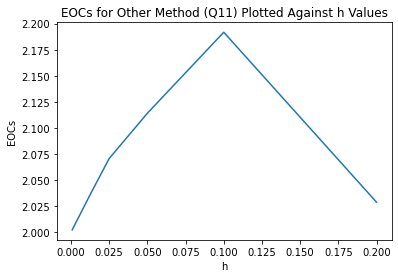

In [4]:
#Q2.2.
T2 = 10
N0 = 25
y0 = [2, -2]
t0 = 0

vals2, eocs2 = eocs_finder(Q11, f1, T2, Y1, N0, y0, t0)

print('h values and error values = \n', vals2)
print('EOCs = \n',eocs2)

plt.plot(vals2[1:,0],eocs2)
plt.title('EOCs for Other Method (Q11) Plotted Against h Values')
plt.xlabel('h')
plt.ylabel('EOCs')
plt.show()

We see our EOcs seem to converge to 2, implying this method having an order of convergence of 2, $O(h^2)$. Our figure implies the same with smaller h showing a convergence to 2.

Our errors, in the second column of the array outputted above, also get smaller as h gets smaller implying the method converges to the real solution

Q 2.3.
--
For each given N we see both methods call phi 10 times, all within the evolve function.
In our forward euler method we call f one time per use. So we see we call f 10 times in Q2.1.
In our other method, labelled Q11, we call f two times per use. So we see we call f 20 times in Q2.2.
So our forward euler method calls f 10 times less than our other method.
But note that the other method, Q11, has EOCs converging to 2 and the forward euler question has EOCs converging to 1. So Q11 has stronger order of convergence.

h values and error values for this new problem for Forward Euler= 
 [[1.20000000e-01 4.90234371e-01]
 [6.00000000e-02 2.41162142e-01]
 [3.00000000e-02 1.03184451e-01]
 [1.50000000e-02 3.04088602e-02]
 [7.50000000e-03 2.40459232e-02]
 [3.75000000e-03 5.22879930e-03]
 [1.87500000e-03 3.56576540e-03]
 [9.37500000e-04 2.73107305e-03]
 [4.68750000e-04 2.31293004e-03]
 [2.34375000e-04 1.12533445e-03]]
EOCs for Forward Euler Method = 
 [1.02346819 1.22477787 1.76266193 0.33869942 2.20124072 0.55226791
 0.38474388 0.23974627 1.03936779]
h values and error values for this new problem for other method, Q11 = 
 [[1.20000000e-01 2.21094332e-01]
 [6.00000000e-02 8.45661338e-02]
 [3.00000000e-02 1.87087291e-02]
 [1.50000000e-02 1.34665651e-02]
 [7.50000000e-03 1.96899368e-03]
 [3.75000000e-03 5.91576066e-03]
 [1.87500000e-03 2.01544743e-03]
 [9.37500000e-04 6.17727487e-05]
 [4.68750000e-04 9.15946526e-04]
 [2.34375000e-04 4.26423985e-04]]
EOCs for other method = 
 [ 1.38651011  2.17636847  0.4743296

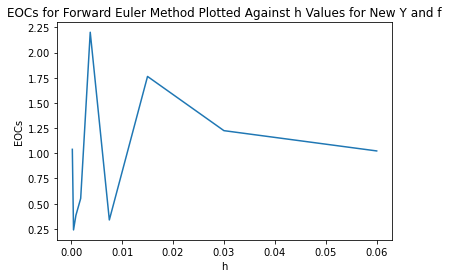

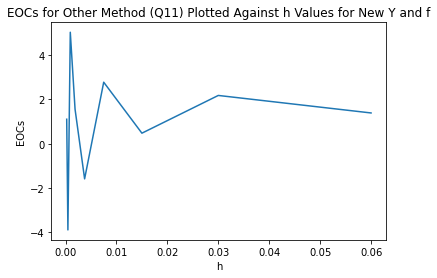

In [5]:
#Q2.4.
# Exact solution
def Y2(t):
    if t < (np.pi)/2:
        return np.sin(t)
    else:
        return np.e**(t-(np.pi/2))

# Right Hand Side
def f2(t, y):
    if t < np.pi/2:
        return np.cos(t)
    else:
        return y
    
# Results for Forward Euler
T3 = 3
N0 = 25
my_y0 = [0]
t0 = 0
fe_vals, fe_eocs = eocs_finder(forwardEuler, f2, T3, Y2, N0, my_y0, t0)
print('h values and error values for this new problem for Forward Euler= \n',fe_vals)
print('EOCs for Forward Euler Method = \n',fe_eocs)

q11_vals, q11_eocs = eocs_finder(Q11, f2, T3, Y2, N0, my_y0, t0)
print('h values and error values for this new problem for other method, Q11 = \n',q11_vals)
print('EOCs for other method = \n',q11_eocs)

plt.plot(fe_vals[1:,0],fe_eocs)
plt.title('EOCs for Forward Euler Method Plotted Against h Values for New Y and f')
plt.xlabel('h')
plt.ylabel('EOCs')
plt.show()

plt.plot(q11_vals[1:,0],q11_eocs)
plt.title('EOCs for Other Method (Q11) Plotted Against h Values for New Y and f')
plt.xlabel('h')
plt.ylabel('EOCs')
plt.show()

We see that the EOCs don't appear to be converging, so both the Forward Euler method and other method, Q11, dont seem to converge for these exact solutions and right hand side. The reasoning for this we can see is that Y2 is not continuously differentiable. In Q1.2. we assumed Y is C3 i.e. continuously differentiable 3 times, so this is why we dont see convergence in this case. In our notes for the Forward Euler method we assumed that the exact solution Y is C2 i.e. continuously differentiable 2 times, so this is why we dont see convergence in this case.

We see in the figures above that our EOC values for both methods bounce around. The forward euler method bounces around the values 0-2 and our other method (Q11) bounces around -5-5. The figures back up our claim that the EOCs do not converge to any specific value for h getting smaller. In fact the smaller we make h the bigger deviations we see.